<details>
  <summary><b>Table of Contents</b></summary>
<ol>
  <li>Data Preprocessing</li>
  <li>Exploratory Data Analysis(EDA)</li>
  <li>Modeling</li>
  <ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
  </ul>
  <li>Evaluation</li>
</ol>

</details>


<h3><strong> Diabetes Prediction</strong></h3>
<p> The dataset is taken from <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
">Kaggle Diabetes Dataset</a></p>





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score, precision_score,recall_score,roc_auc_score
import joblib


<div id="data-preprocessing">
<h3><strong>Data Preprocessing</strong></h3>
</div>



**Step 1 :** Data Preprocessing
<ul>

<li>Creating Data Frame</li>
<li>Handling Missing Values</li>
<li>Training and Test Set</li>
<li>Feature Scaling</li>
</ul>


In [ ]:
def preprocess_data(file_name,model_name):
  # Creating a dataframe
  df = pd.read_csv(file_name)
  X = df.iloc[:,:-1].values
  y = df.iloc[:,-1].values
  # Handle missing values by mean
  imputer = SimpleImputer(missing_values=0.0,strategy="mean")
  imputer.fit(X)
  X = imputer.transform(X)

  # Splitting
  X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

  # Scaling not required for tree based models Decision trees, random forest, XGboost etc
  if model_name not in ["RandomForestClassifier","XGBClassifier","DecisionTreeClassifier"]:
    # Feature Scaling
    # Replacing all zeroes in X_train and X_test with mean(As asked in assessment )
    # Since there are no missing values known from eda we will not focus on na values
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
  return (X_train,y_train,X_test,y_test)


**Step 2 : EDA(EXPLORATORY DATA ANALYSIS)**
<ul>
<li>EDA Analysis</li>
<li>Correlation(EDA Plot) </li>
</ul>


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64


/tmp/ipython-input-1869104158.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_diabetes.index,y=corr_with_diabetes.values,palette="coolwarm")


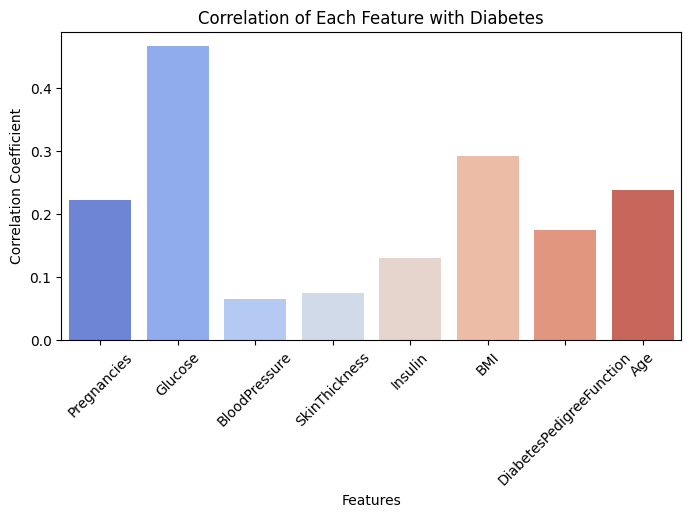

In [ ]:
df = pd.read_csv("diabetes.csv")
# EDA
def eda_analysis():
  print(f"Shape of Data {df.shape}")
  print("*******************************")
  print(f"Data Frame first 5 elements \n {df.head()}")
  print("*******************************")
  print(f"Data Info  \n {df.info()}")
  print("*******************************")
  print(f"Data Describe  \n{df.describe().T}")
  print("*******************************")
  print(f"Columns in List  \n{df.columns.tolist()}")
  print("*******************************")
  print(f"Number of duplicate rows: {df.duplicated().sum()}")

  print(f"Check for missing values {df.isnull().sum()}")

def eda_plot_analysis():
  corr_with_diabetes = df.corr()['Outcome'].drop('Outcome')
  print(corr_with_diabetes)
  plt.figure(figsize=(8,4)) # 6 Rows and 4 Columns
  sns.barplot(x=corr_with_diabetes.index,y=corr_with_diabetes.values,palette="coolwarm")
  plt.title("Correlation of Each Feature with Diabetes")
  plt.ylabel("Correlation Coefficient")
  plt.xlabel("Features")
  plt.xticks(rotation=45)
  plt.show()
eda_plot_analysis()

<div id="logistic-regression">
<h3><b>Model 1: LOGISTIC REGRESSION</b></h3>
<b><p>Metrics </p></b>
<ul>
<li> Accuracy – Overall correctness of the model. </li>
<li> Precision – Out of predicted diabetics, how many were correct. </li>
<li> Recall (Sensitivity) – Out of actual diabetics, how many were detected. </li>
<li> F1-Score – Balance between precision & recall. </li>
<li> ROC-AUC – Ability to distinguish between classes. </li>
</ul>
</div>

In [ ]:
def model_building(classifier,file_name):
  X_train,y_train,X_test,y_test = preprocess_data(file_name = file_name,model_name=classifier.__class__.__name__)
  classifier.fit(X_train,y_train)
  # Predictions on Test set
  y_pred = classifier.predict(X_test)
  # print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
  save_model(classifier,classifier.__class__.__name__)
  return y_test,y_pred,classifier


def model_metrics(classifier,file_name):
  y_test,y_pred,_ = model_building(classifier,file_name)
  #Confusion Matrix
  cm = confusion_matrix(y_test,y_pred)
  # print(cm)
  accuracy = accuracy_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  roc = roc_auc_score(y_test,y_pred)
  return accuracy,precision,recall,f1,roc


def print_metrics(classifier):
  accuracy,precision,recall,f1,roc = model_metrics(classifier = classifier,file_name = "diabetes.csv")
  print(f"********** Metrics for {classifier.__class__.__name__} ***************")
  print(f"Accuracy {(accuracy) * 100}")
  print(f"Precision {(precision) * 100}")
  print(f"Recall {(recall) * 100}")
  print(f"F1 Score {(f1) * 100}")
  print(f"ROC Score {(roc) * 100}")
  print("\n")

def save_model(model,model_name):
  joblib.dump(model,f"{model_name}.pkl")

  print(f"{model_name} Model saved!")

def load_model(model_name):
  loaded_model = joblib.load(model_name)
  return loaded_model

<strong> Random Forest </strong>

In [ ]:
logistic_regression_classifier = LogisticRegression(random_state=42,max_iter=1000)
random_forest_classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=300,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss')

print_metrics(logistic_regression_classifier)
print_metrics(random_forest_classifier)
print_metrics(xgboost_classifier)



LogisticRegression Model saved!
********** Metrics for LogisticRegression ***************
Accuracy 77.92207792207793
Precision 79.06976744186046
Recall 57.6271186440678
F1 Score 66.66666666666666
ROC Score 74.07671721677075


RandomForestClassifier Model saved!
********** Metrics for RandomForestClassifier ***************
Accuracy 75.32467532467533
Precision 80.0
Recall 47.45762711864407
F1 Score 59.57446808510638
ROC Score 70.04460303300625


XGBClassifier Model saved!
********** Metrics for XGBClassifier ***************
Accuracy 75.32467532467533
Precision 75.60975609756098
Recall 52.54237288135594
F1 Score 62.0
ROC Score 71.00802854594112




### Evaluation

Results Table:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.771,0.724,0.567,0.633,0.724
Random Forest,0.756,0.688,0.552,0.612,0.709
XGBoost,0.768,0.713,0.571,0.632,0.722


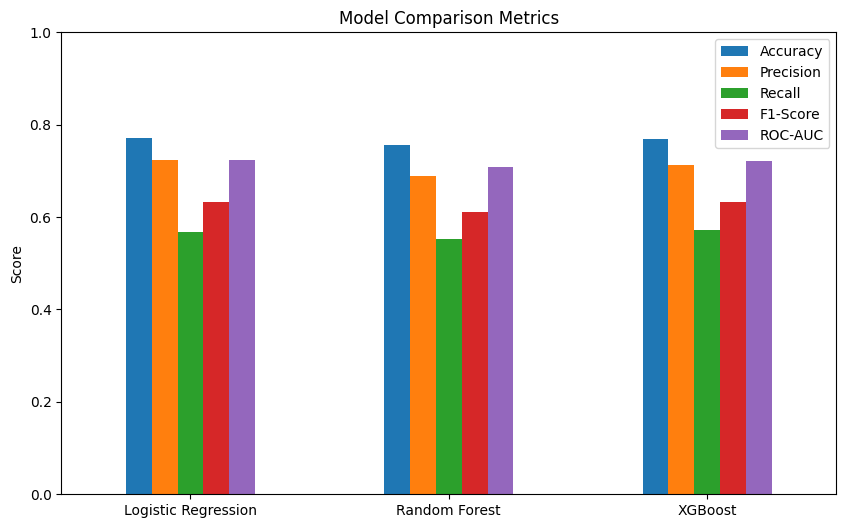

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("diabetes.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

def evaluate_model_cv(model, X, y, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracy_list, precision_list, recall_list, f1_list, roc_list = [], [], [], [], []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        roc_list.append(roc_auc_score(y_test, y_pred))

    return {
        "Accuracy": np.mean(accuracy_list),
        "Precision": np.mean(precision_list),
        "Recall": np.mean(recall_list),
        "F1-Score": np.mean(f1_list),
        "ROC-AUC": np.mean(roc_list)
    }

classifiers = {
    "Logistic Regression": logistic_regression_classifier,
    "Random Forest": random_forest_classifier,
    "XGBoost": xgboost_classifier
}
def show_tabular_metrics():
  results = {}
  for name, clf in classifiers.items():
      results[name] = evaluate_model_cv(clf, X, y, cv=5)

  results_df = pd.DataFrame(results).T
  results_df = results_df.round(3)
  print("Results Table:")
  display(results_df)

  results_df.plot(kind="bar", figsize=(10,6))
  plt.title("Model Comparison Metrics")
  plt.ylabel("Score")
  plt.ylim(0,1)
  plt.xticks(rotation=0)
  plt.show()

def show_roc_curve():

  plt.figure(figsize=(8,6))

  for name, clf in classifiers.items():

      X_train, y_train, X_test,y_test = preprocess_data(file_name='diabetes.csv',model_name = clf)

      clf.fit(X_train, y_train)
      y_score = clf.predict_proba(X_test)[:,1]
      fpr, tpr, _ = roc_curve(y_test, y_score)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

      # Diagonal line (random classifier)
  plt.plot([0,1], [0,1], 'k--', lw=1, label='Random')

  plt.title('ROC Curve Comparison')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show()

show_tabular_metrics()


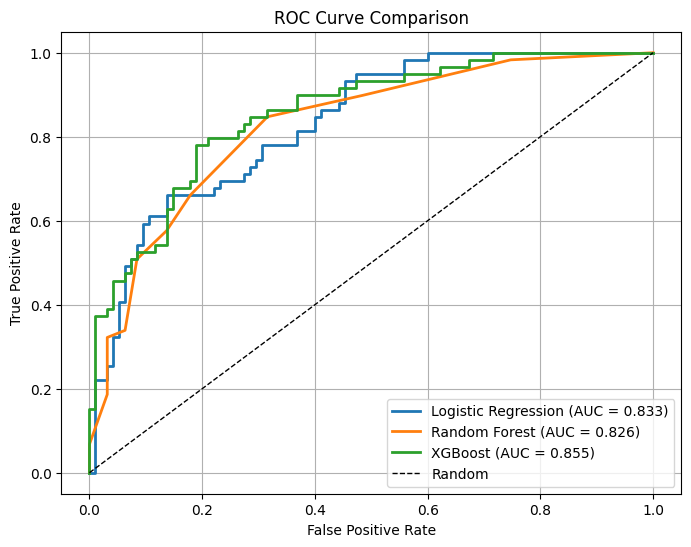

In [ ]:
show_roc_curve()

In [ ]:
# OPTIONAL
def grid_search(X_train,y_train):
  from sklearn.model_selection import GridSearchCV

  param_grid = {
      'max_depth': [3, 4, 5, 6],
      'learning_rate': [0.01, 0.05, 0.1],
      'n_estimators': [100, 200, 300],
      'subsample': [0.7, 0.8, 1.0],
      'colsample_bytree': [0.7, 0.8, 1.0]
  }

  grid = GridSearchCV(
      estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
      param_grid=param_grid,
      scoring='roc_auc',
      cv=5,
      verbose=1
  )
  grid.fit(X_train, y_train)
  print(grid.best_params_)
  print(grid.best_score_)
